In [ ]:
# !pip install roboflow

In [4]:
import json
with open("/content/drive/MyDrive/images/_annotations.coco.json") as f:
    obj=json.load(f)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
obj

{'info': {'year': '2025',
  'version': '1',
  'description': 'Exported from roboflow.com',
  'contributor': '',
  'url': 'https://public.roboflow.com/object-detection/undefined',
  'date_created': '2025-10-28T17:24:27+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://creativecommons.org/licenses/by/4.0/',
   'name': 'CC BY 4.0'}],
 'categories': [{'id': 0, 'name': 'objects', 'supercategory': 'none'},
  {'id': 1, 'name': 'fish', 'supercategory': 'objects'}],
 'images': [{'id': 0,
   'license': 1,
   'file_name': 'download_jpeg.rf.51f56cc777cca477e718e65c5b6d6035.jpg',
   'height': 640,
   'width': 640,
   'date_captured': '2025-10-28T17:24:27+00:00',
   'extra': {'name': 'download.jpeg'}},
  {'id': 1,
   'license': 1,
   'file_name': 'download-2-_jpeg.rf.2dca21cd6d77d3d7b31ac6b44572e45a.jpg',
   'height': 640,
   'width': 640,
   'date_captured': '2025-10-28T17:24:27+00:00',
   'extra': {'name': 'download-2-.jpeg'}},
  {'id': 2,
   'license': 1,
   'file_name': 'download-3-_jpeg.rf.d4

In [41]:
category_map={ i['id']:i['name'] for i in obj['categories']}
category_map

{0: 'objects', 1: 'fish'}

In [42]:
image_map={ i['id']:i['file_name'] for i in obj['images']}
image_map

{0: 'download_jpeg.rf.51f56cc777cca477e718e65c5b6d6035.jpg',
 1: 'download-2-_jpeg.rf.2dca21cd6d77d3d7b31ac6b44572e45a.jpg',
 2: 'download-3-_jpeg.rf.d44794a686d9f7e118e68ec4e0bc4cbf.jpg',
 3: 'download-1-_jpeg.rf.19d3db0166593ba6bae30ac4b342ebf5.jpg'}

In [48]:
annotations={}
for ann in obj['annotations']:
  if ann['image_id'] not in annotations:
    annotations[ann['image_id']] = []

  annotations[ann['image_id']].append(ann['bbox'])
annotations

{0: [[67, 4, 566, 631]],
 1: [[150, 128, 414, 457.5]],
 2: [[20, 26, 303.5, 143],
  [20, 178, 308.5, 172.5],
  [16, 376, 315, 117.5],
  [30, 509, 310.5, 94.5],
  [339, 26, 296.5, 152],
  [340, 180, 286.5, 142.5],
  [347, 333, 283.5, 129],
  [355, 467, 280, 161]],
 3: [[4, 6, 191.5, 181],
  [223, 4, 191, 188.5],
  [437, 17, 198, 166],
  [25, 227, 161.5, 179],
  [231, 228, 171, 145.5],
  [442, 222, 195.5, 175],
  [21, 437, 156.5, 134],
  [240, 445, 168.5, 168.5],
  [450, 441, 159.5, 187]]}

In [49]:
# coco format gives us x_min,y_min,width and height of bounding box
from PIL import Image,ImageDraw
def visualise_image(img_id):
    global annotations,image_map,category_map
    img=Image.open("/content/drive/MyDrive/images/"+image_map[img_id])
    draw=ImageDraw.Draw(img)
    for ann in annotations[img_id]:
      draw.rectangle([ann[0],ann[1],ann[0]+ann[2],ann[1]+ann[3]],outline='red',width=3)
    return img

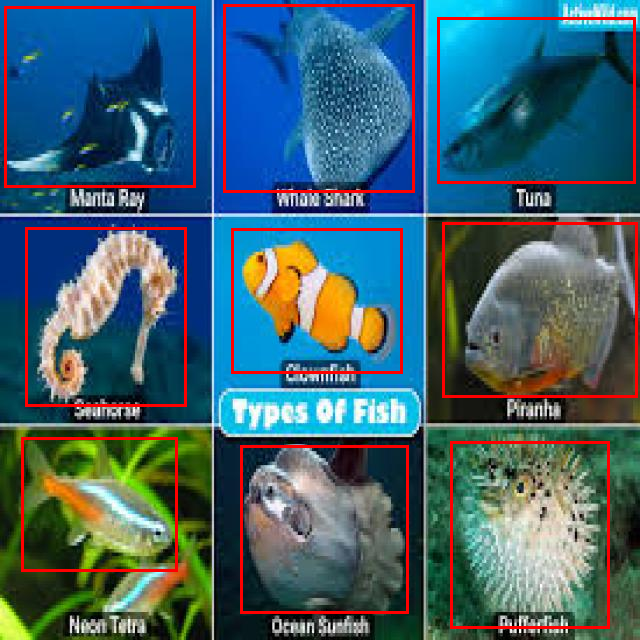

In [50]:
visualise_image(3)

In [51]:
# using pycocotools
from pycocotools.coco import COCO

def load_coc_annotations(file_path):
  return COCO(file_path)

In [62]:
annotations=load_coc_annotations("/content/drive/MyDrive/images/_annotations.coco.json")

def visualise_image(img_id):
    global annotations,image_map,category_map
    img=Image.open("/content/drive/MyDrive/images/"+image_map[img_id])
    draw=ImageDraw.Draw(img)

    ann_ids=annotations.getAnnIds(imgIds=annotations.loadImgs(img_id)[0]['id'])
    anns=annotations.loadAnns(ann_ids)

    for ann in anns:
      bbox=ann['bbox']
      draw.rectangle([bbox[0],bbox[1],bbox[0]+bbox[2],bbox[1]+bbox[3]],outline='red',width=3)
      draw.text((bbox[0],bbox[1]), annotations.loadCats(ann['category_id'])[0]['name'], fill="white")

    return img

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


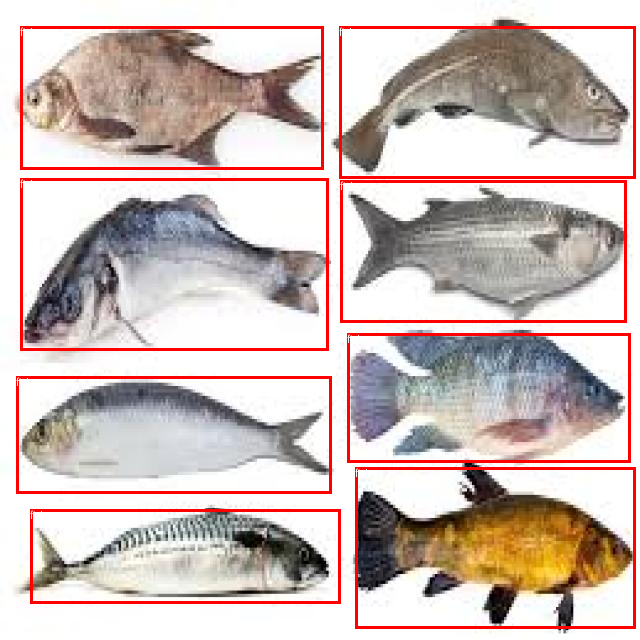

In [63]:
visualise_image(2)